<h1>Covid Tweets EDA</h1>

<b>The tasks for this EDA are to:</b>
<ol>
<li>Read in the tweets JSON and process</li>
<li>Investigate word use in the text</li>
<li>Look and word use and sentiment over time</li>
<li>Investigate which fields to use for Geographical analysis later on</li>
</ol>

We read in the tweets from the twitter JSON and listen specifically for words related to COVID-19 in English using the listen_tweets.py script. This appends the tweets to the may_tweets.file. Then we flatten the JSON. 

We collected data from four days in May over roughly over a 7 minute window.

In [1]:
'''
import json
# String of path to file: tweets_data_path
tweets_data_path = 'may_tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    try:
        tweet = json.loads(line)
           # flatten the json so we can easily access the location of the user as well as other text elements 
        tweet['determined_location']= tweet['user']['location']
        # extracting the retweeted text
        if tweet['retweeted']==True:
            if tweet['retweeted_status']['truncated']==True:
                tweet['retweeted_status-text']=tweet['retweeted_status']['extended_tweet']['full_text']
            else:
                tweet['retweeted_status-text']=tweet['retweeted_status']['text']
        else:
            tweet['retweeted_status-text']=''
        # extracting the quoted tweet
        if tweet['is_quote_status']==True:
            if tweet['quoted_status']['truncated']==True:
                tweet['quoted_status-text']=tweet['quoted_status']['extended_tweet']['full_text']
            else:
                tweet['quoted_status-text']=tweet['quoted_status']['text']
        else:
            tweet['quoted_status-text']= ''
        # extracting the full tweet if truncated --> not correct
        if tweet['truncated']==True:
            tweet['text'] = tweet['extended_tweet']['full_text']

        tweet['all_text']=tweet['text']+tweet['retweeted_status-text']+ tweet['quoted_status-text']
        tweets_data.append(tweet)
    except:
        continue

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())
'''

'\nimport json\n# String of path to file: tweets_data_path\ntweets_data_path = \'may_tweets.txt\'\n\n# Initialize empty list to store tweets: tweets_data\ntweets_data = []\n\n# Open connection to file\ntweets_file = open(tweets_data_path, "r")\n\n# Read in tweets and store in list: tweets_data\nfor line in tweets_file:\n    try:\n        tweet = json.loads(line)\n           # flatten the json so we can easily access the location of the user as well as other text elements \n        tweet[\'determined_location\']= tweet[\'user\'][\'location\']\n        # extracting the retweeted text\n        if tweet[\'retweeted\']==True:\n            if tweet[\'retweeted_status\'][\'truncated\']==True:\n                tweet[\'retweeted_status-text\']=tweet[\'retweeted_status\'][\'extended_tweet\'][\'full_text\']\n            else:\n                tweet[\'retweeted_status-text\']=tweet[\'retweeted_status\'][\'text\']\n        else:\n            tweet[\'retweeted_status-text\']=\'\'\n        # extracti

In [2]:
import pandas as pd
df = pd.read_csv('tweets_procesed.csv' ,index_col=0)
df.head()

,created_at,text,lang,quoted_status-text,retweeted_status-text,all_text,determined_location
0,Tue May 05 11:14:28 +0000 2020,RT @ASlavitt: BREAKING: The organization Trump...,en,NaN,NaN,RT @ASlavitt: BREAKING: The organization Trump...,"Cocoa, Florida"
1,Tue May 05 11:14:29 +0000 2020,"RT @Therinesky: 11,000 ABS-CBN employees are b...",en,NaN,NaN,"RT @Therinesky: 11,000 ABS-CBN employees are b...",Manila
2,Tue May 05 11:14:29 +0000 2020,RT @MidwivesRCM: Midwives &amp; UK maternity ...,en,NaN,NaN,RT @MidwivesRCM: Midwives &amp; UK maternity ...,"Leeds, England"
3,Tue May 05 11:14:29 +0000 2020,A Storm Is Brewing\n\n#QAnon #WWG1WGA #TheGrea...,en,NaN,NaN,A Storm Is Brewing\n\n#QAnon #WWG1WGA #TheGrea...,"Zachary, LA"
4,Tue May 05 11:14:29 +0000 2020,RT @gtconway3d: I guess we know what keeps the...,en,A group of RINO Republicans who failed badly 1...,NaN,RT @gtconway3d: I guess we know what keeps the...,"Pittsburgh, PA"


In [3]:
#df = pd.DataFrame(tweets_data, columns=['created_at','text', 'lang', 'quoted_status-text', 'retweeted_status-text','all_text','determined_location'])
#df.head()

We make twitter data processed this way available for later use 

In [4]:
#df.to_csv('tweets_procesed.csv')

We create two functions to find the presence of a word in the tweet

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40206 entries, 0 to 40205
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             40206 non-null  object 
 1   text                   40206 non-null  object 
 2   lang                   40206 non-null  object 
 3   quoted_status-text     8309 non-null   object 
 4   retweeted_status-text  0 non-null      float64
 5   all_text               40206 non-null  object 
 6   determined_location    27824 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.5+ MB


In [6]:
import numpy as np
text_columns = ['text', 'quoted_status-text', 'retweeted_status-text']
in_english = df['lang']=='en'

# function to check the presence of a word
def check_word(word):
    col = ['text', 'quoted_status-text', 'retweeted_status-text']
    in_english = df['lang']=='en'
    word_bol = df[col[0]].str.contains(word, case=False)
    for i in range(1,3):
        try:
            word_bol |= df[col[i]].str.contains(word, case=False)
        except:
            continue
    word_bol &= in_english
    word_percent = (np.sum(word_bol)/df[df['lang']=='en'].shape[0])
    return word_percent

In [7]:
# needed to extract the word boolean series to later count up 
def check_word_bol(word):
    col = ['text', 'quoted_status-text', 'retweeted_status-text']
    in_english = df['lang']=='en'
    word_bol = df[col[0]].str.contains(word, case=False)
    for i in range(1,3):
        try: 
            word_bol |= df[col[i]].str.contains(word, case=False)
        except:
            continue
    word_bol &= in_english
    word_percent = (np.sum(word_bol)/df[df['lang']=='en'].shape[0])*100
    return word_bol

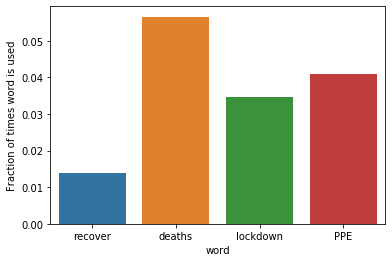

In [8]:
words = ['recover', 'deaths', 'lockdown', 'PPE']

words_use_frac = list((map(check_word, words)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(words,words_use_frac)
plt.ylabel('Fraction of times word is used')
plt.xlabel('word')
plt.show()


Analysis of a word use over time, limiting the analysis over one day

In [9]:
df.reset_index(inplace=True)
df.columns
df['created_at'] = pd.to_datetime(df['created_at'])
print(df['created_at'].head())

0   2020-05-05 11:14:28+00:00
1   2020-05-05 11:14:29+00:00
2   2020-05-05 11:14:29+00:00
3   2020-05-05 11:14:29+00:00
4   2020-05-05 11:14:29+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [10]:
#Taking only tweets from May 6th
#df = df[df.index.day==5]
#df.to_csv('may_5_tweets.csv')
df = pd.read_csv('may_5_tweets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
df.head()

,created_at,text,lang,quoted_status-text,retweeted_status-text,all_text,determined_location,deaths_mention,recovery_mention
0,2020-05-05 11:14:28+00:00,RT @ASlavitt: BREAKING: The organization Trump...,en,NaN,NaN,RT @ASlavitt: BREAKING: The organization Trump...,"Cocoa, Florida",True,False
1,2020-05-05 11:14:29+00:00,"RT @Therinesky: 11,000 ABS-CBN employees are b...",en,NaN,NaN,"RT @Therinesky: 11,000 ABS-CBN employees are b...",Manila,False,False
2,2020-05-05 11:14:29+00:00,RT @MidwivesRCM: Midwives &amp; UK maternity ...,en,NaN,NaN,RT @MidwivesRCM: Midwives &amp; UK maternity ...,"Leeds, England",False,False
3,2020-05-05 11:14:29+00:00,A Storm Is Brewing\n\n#QAnon #WWG1WGA #TheGrea...,en,NaN,NaN,A Storm Is Brewing\n\n#QAnon #WWG1WGA #TheGrea...,"Zachary, LA",False,False
4,2020-05-05 11:14:29+00:00,RT @gtconway3d: I guess we know what keeps the...,en,A group of RINO Republicans who failed badly 1...,NaN,RT @gtconway3d: I guess we know what keeps the...,"Pittsburgh, PA",False,False


In [11]:
df.set_index('created_at', inplace=True)

In [12]:
print(df.index.max())
print(df.index.min())
# we have only 7 minutes worth of data

2020-05-05 11:21:24+00:00
2020-05-05 11:14:28+00:00


Investigating the use of the word "recovery" versus "death" over time

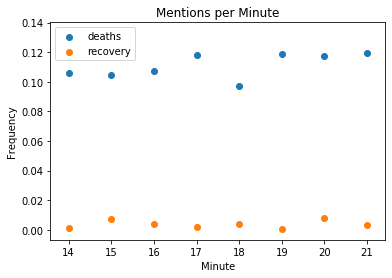

In [14]:
df['deaths_mention']=check_word_bol('death')
df['recovery_mention']= check_word_bol('recovery')

mean_death = df['deaths_mention'].resample('1 min').mean()
mean_recover = df['recovery_mention'].resample('1 min').mean()

plt.scatter(mean_death.index.minute, mean_death)
plt.scatter(mean_recover.index.minute, mean_recover)

plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.title('Mentions per Minute')
plt.legend(('deaths', 'recovery'))
plt.show()


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid  = SentimentIntensityAnalyzer()
sentiment_score_text = df['text'].apply(sid.polarity_scores)  

#we need this to extract only the compound sentiment score, which goes from -1 to 1 and tells us how negative or positive the tweet is 
sentiment = sentiment_score_text.apply(lambda x: x['compound'])
print(df[sentiment > 0.7].values[0])
# printing a positive tweet
print(df[sentiment < -0.7].values[0])
# printing a negative tweet

["RT @Z_Everson: President's hotel eligible for $37,000 COVID-19 relief grant from D.C.'s taxpayer-funded convention authority\n\nvia @1100penn…"
 'en' nan nan
 "RT @Z_Everson: President's hotel eligible for $37,000 COVID-19 relief grant from D.C.'s taxpayer-funded convention authority\n\nvia @1100penn…"
 'DC' False False]
["RT @galendruke: Lots to talk about on today's podcast:\n\n-Where we are in the COVID-19 crisis\n-How Dems are reacting to the Biden assault al…"
 'en' nan nan
 "RT @galendruke: Lots to talk about on today's podcast:\n\n-Where we are in the COVID-19 crisis\n-How Dems are reacting to the Biden assault al…"
 'United States' False False]


Looking at sentiment over time for the 6th of May

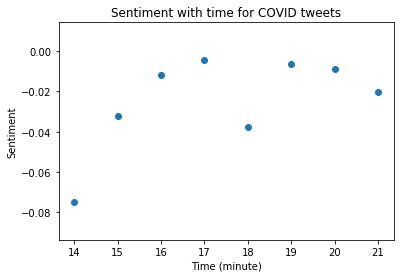

In [16]:
sentiment_covid = sentiment.resample('1 min').mean()
plt.scatter(sentiment_covid.index.minute, sentiment_covid, )

plt.xlabel('Time (minute)')
plt.ylabel('Sentiment')
plt.title('Sentiment with time for COVID tweets')
plt.show()


We could extend this analysis over several days or measure sentiment as a policy change is put into place

The percentage of real user location data from places is too low to be worth using for later analysis, so we will use the determined_location instead for geographical analysis

In [17]:
'''
places = []
for tweet in tweets_data:
    if tweet['place'] == None:
        continue
    else:
        places.append(tweet['place']['name'])
print("The percentage of tweets from the sample with location coordinates enabled is {} percent".format(len(places)/len(tweets_data)*100))
'''

'\nplaces = []\nfor tweet in tweets_data:\n    if tweet[\'place\'] == None:\n        continue\n    else:\n        places.append(tweet[\'place\'][\'name\'])\nprint("The percentage of tweets from the sample with location coordinates enabled is {} percent".format(len(places)/len(tweets_data)*100))\n'

In [18]:
'''
user_location = []

for tweet in tweets_data:
    if tweet['determined_location']!=None:
        user_location.append(tweet['determined_location'])
    else:
        continue

print("The percentage of tweets from the sample with location coordinates enabled is {} percent".format(len(user_location)/len(user_location)*100))
#many of these locations are non sensical but we can try to extract meaning
'''

'\nuser_location = []\n\nfor tweet in tweets_data:\n    if tweet[\'determined_location\']!=None:\n        user_location.append(tweet[\'determined_location\'])\n    else:\n        continue\n\nprint("The percentage of tweets from the sample with location coordinates enabled is {} percent".format(len(user_location)/len(user_location)*100))\n#many of these locations are non sensical but we can try to extract meaning\n'